In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Ignore warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Battery_RUL.csv')

In [3]:
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


### Split data into feature and target

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["RUL", "Charging time (s)", "Time constant current (s)"])  
y = data["RUL"]

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalization

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)

### Modeling

#### 1. Random Forest:

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict RUL on the test data
rf_predictions = rf_model.predict(X_test)

# print metrics
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_explained_variance = explained_variance_score(y_test, rf_predictions)

print("Random Forest RMSE:", rf_rmse)
print("Random Forest MAE:", rf_mae)
print("Random Forest R-squared:", rf_r2)
print("Random Forest Explained Variance:", rf_explained_variance)


Random Forest RMSE: 3.7293263522366726
Random Forest MAE: 2.097812811151676
Random Forest R-squared: 0.9998657354541721
Random Forest Explained Variance: 0.9998657595375604


#### 2. Gradient Boosting (XGBoost):

In [8]:
import xgboost as xgb

# Create an XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict RUL on the test data
xgb_predictions = xgb_model.predict(X_test)

# Calculate and Print metrics
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_explained_variance = explained_variance_score(y_test, xgb_predictions)

print("XGBoost RMSE:", xgb_rmse)
print("XGBoost MAE:", xgb_mae)
print("XGBoost R-squared:", xgb_r2)
print("XGBoost Explained Variance:", xgb_explained_variance)


XGBoost RMSE: 4.7873129528439735
XGBoost MAE: 3.191638211875788
XGBoost R-squared: 0.9997787495285886
XGBoost Explained Variance: 0.9997787550525171


#### 3. Ridge Regression:

In [9]:
from sklearn.linear_model import Ridge

# Create a Ridge Regressor
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict RUL on the test data
ridge_predictions = ridge_model.predict(X_test)

# Calculate and Print metrics
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_explained_variance = explained_variance_score(y_test, ridge_predictions)

print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression MAE:", ridge_mae)
print("Ridge Regression R-squared:", ridge_r2)
print("Ridge Regression Explained Variance:", ridge_explained_variance)


Ridge Regression RMSE: 7.4167278436015485
Ridge Regression MAE: 4.642479615787497
Ridge Regression R-squared: 0.9994689624237272
Ridge Regression Explained Variance: 0.9994692630769584


#### 4. Feed forward Neural Network (Using TensorFlow/Keras):

In [10]:
import tensorflow as tf
from tensorflow import keras

# Set a fixed random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict RUL on the test data
nn_predictions = model.predict(X_test)

# Calculate and Print metrics
nn_rmse = mean_squared_error(y_test, nn_predictions, squared=False)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)
nn_explained_variance = explained_variance_score(y_test, nn_predictions)

print("Neural Network RMSE:", nn_rmse)
print("Neural Network MAE:", nn_mae)
print("Neural Network R-squared:", nn_r2)
print("Neural Network Explained Variance:", nn_explained_variance)


Epoch 1/50
377/377 [==============================] - 2s 3ms/step - loss: 317892.3438 - val_loss: 144904.2812
Epoch 2/50
377/377 [==============================] - 1s 3ms/step - loss: 112354.4297 - val_loss: 84968.6250
Epoch 3/50
377/377 [==============================] - 1s 3ms/step - loss: 60867.3711 - val_loss: 36202.3906
Epoch 4/50
377/377 [==============================] - 1s 3ms/step - loss: 18794.4219 - val_loss: 6899.2563
Epoch 5/50
377/377 [==============================] - 1s 3ms/step - loss: 3451.0461 - val_loss: 2468.1050
Epoch 6/50
377/377 [==============================] - 1s 3ms/step - loss: 1742.6619 - val_loss: 1657.4768
Epoch 7/50
377/377 [==============================] - 1s 3ms/step - loss: 1236.6783 - val_loss: 1186.0170
Epoch 8/50
377/377 [==============================] - 1s 3ms/step - loss: 914.7838 - val_loss: 907.9033
Epoch 9/50
377/377 [==============================] - 1s 3ms/step - loss: 710.6416 - val_loss: 754.1057
Epoch 10/50
377/377 [===================

##### Comparing metrics

In [11]:
# Define a list of model names and their corresponding metrics
model_metrics = [
    ('Random Forest', rf_rmse, rf_mae, rf_r2, rf_explained_variance),
    ('XGBoost', xgb_rmse, xgb_mae, xgb_r2, xgb_explained_variance),
    ('Ridge', ridge_rmse, ridge_mae, ridge_r2, ridge_explained_variance),
    ('Neural Network', nn_rmse, nn_mae, nn_r2, nn_explained_variance)
]

# Sort models based on RMSE
sorted_models_rmse = sorted(model_metrics, key=lambda x: x[1])

print("Models sorted by RMSE:")
for model in sorted_models_rmse:
    print(f"{model[0]} - RMSE: {model[1]}")

# Sort models based on MAE
sorted_models_mae = sorted(model_metrics, key=lambda x: x[2])

print("\nModels sorted by MAE:")
for model in sorted_models_mae:
    print(f"{model[0]} - MAE: {model[2]}")

# Sort models based on R-squared
sorted_models_r2 = sorted(model_metrics, key=lambda x: x[3], reverse=True)

print("\nModels sorted by R-squared:")
for model in sorted_models_r2:
    print(f"{model[0]} - R-squared: {model[3]}")

# Sort models based on Explained Variance
sorted_models_variance = sorted(model_metrics, key=lambda x: x[4], reverse=True)

print("\nModels sorted by Explained Variance:")
for model in sorted_models_variance:
    print(f"{model[0]} - Explained Variance: {model[4]}")


Models sorted by RMSE:
Random Forest - RMSE: 3.7293263522366726
XGBoost - RMSE: 4.7873129528439735
Ridge - RMSE: 7.4167278436015485
Neural Network - RMSE: 9.073506631703165

Models sorted by MAE:
Random Forest - MAE: 2.097812811151676
XGBoost - MAE: 3.191638211875788
Ridge - MAE: 4.642479615787497
Neural Network - MAE: 6.262212785818313

Models sorted by R-squared:
Random Forest - R-squared: 0.9998657354541721
XGBoost - R-squared: 0.9997787495285886
Ridge - R-squared: 0.9994689624237272
Neural Network - R-squared: 0.9992052127545002

Models sorted by Explained Variance:
Random Forest - Explained Variance: 0.9998657595375604
XGBoost - Explained Variance: 0.9997787550525171
Ridge - Explained Variance: 0.9994692630769584
Neural Network - Explained Variance: 0.9992498884636183


All models achieved good performance metrics for predicting battery Remaining Useful Life (RUL). However, the Random Forest model stands out as the top-performing choice, exhibiting the lowest RMSE, MAE, and the highest R-squared and Explained Variance scores. XGBoost also demonstrates strong performance and can be considered as a viable alternative for RUL prediction. While Ridge Regression and the Neural Network model achieved reasonable results, they were surpassed by the Random Forest and XGBoost models in this analysis.

##### Model Evaluation: Actual vs. Predicted RUL

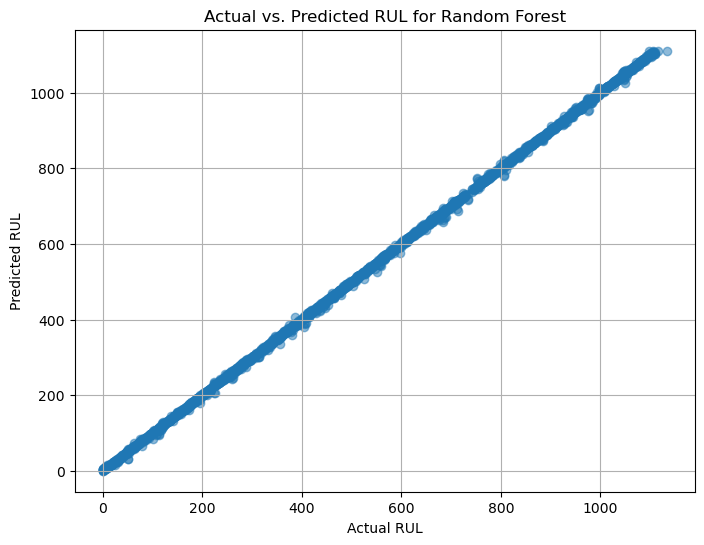

RMSE for Random Forest: 3.7293263522366726


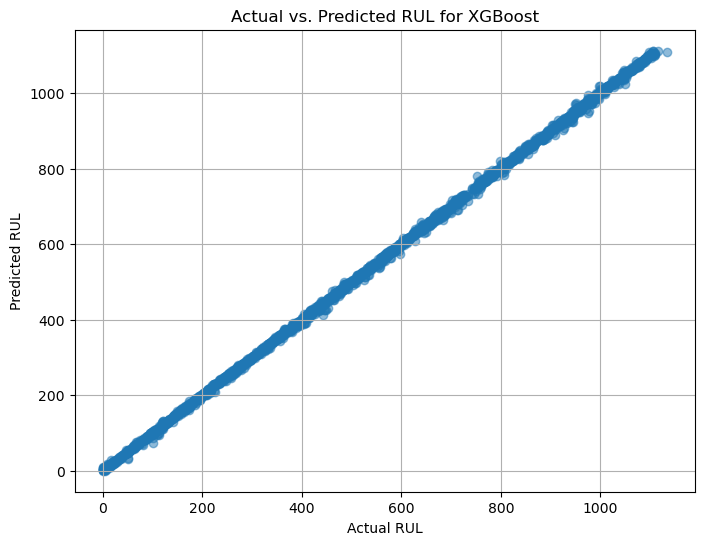

RMSE for XGBoost: 4.7873129528439735


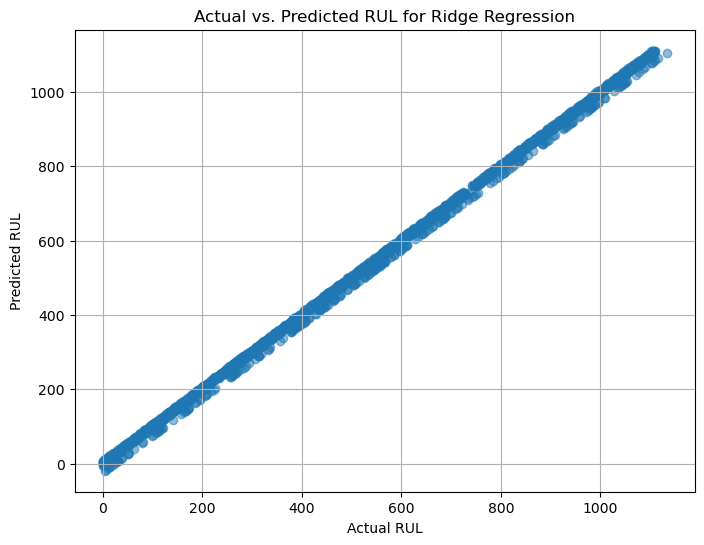

RMSE for Ridge Regression: 7.4167278436015485


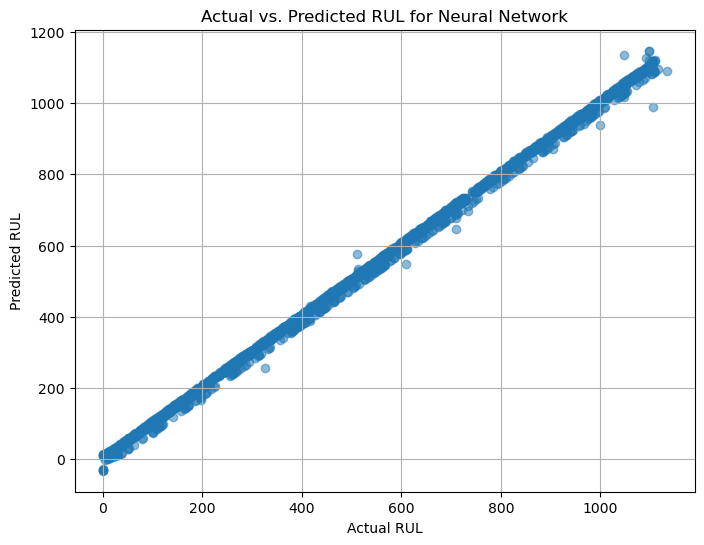

RMSE for Neural Network: 9.073506631703165


In [12]:
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('Actual RUL')
    plt.ylabel('Predicted RUL')
    plt.title(f'Actual vs. Predicted RUL for {model_name}')
    plt.grid(True)
    plt.show()

# For Random Forest
plot_actual_vs_predicted(y_test, rf_predictions, "Random Forest")
print("RMSE for Random Forest:", rf_rmse)

# For XGBoost
plot_actual_vs_predicted(y_test, xgb_predictions, "XGBoost")
print("RMSE for XGBoost:", xgb_rmse)

# For Ridge Regression
plot_actual_vs_predicted(y_test, ridge_predictions, "Ridge Regression")
print("RMSE for Ridge Regression:", ridge_rmse)

# For Neural Network
plot_actual_vs_predicted(y_test, nn_predictions, "Neural Network")
print("RMSE for Neural Network:", nn_rmse)


All models have predicted values that closely align with the actual values. Specifically, Random Forest, XGBoost, and Ridge Regression exhibit predictions that are in closer proximity to the actual values when compared to the Neural Network model. These three models demonstrate superior predictive accuracy for the given dataset.

### Hyperparameter tuning for Random forest

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_rf_model = grid_search.best_estimator_

# Predict RUL on the test data using the best model
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluate the best model
best_rf_rmse = mean_squared_error(y_test, best_rf_predictions, squared=False)
best_rf_mae = mean_absolute_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)
best_rf_explained_variance = explained_variance_score(y_test, best_rf_predictions)

print("Best Random Forest RMSE:", best_rf_rmse)
print("Best Random Forest MAE:", best_rf_mae)
print("Best Random Forest R-squared:", best_rf_r2)
print("Best Random Forest Explained Variance:", best_rf_explained_variance)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest RMSE: 3.6848246151739636
Best Random Forest MAE: 2.067464321274477
Best Random Forest R-squared: 0.9998689206706619
Best Random Forest Explained Variance: 0.9998689526658227


After hyperparameter tuning, the Random Forest model has led to improved performance across all metrics.

RMSE decreased from 3.72 to 3.68; MAE decreased from 2.09 to 2.06; R-squared increased from 0.999865 to 0.999868; 
Explained Variance increased from 0.999865 to 0.999868.

These improvements indicate that the model's predictive accuracy has slightly increased after tuning, making it an even better choice for this dataset.

### Hyperparameter tuning for XGBoost

In [14]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform GridSearchCV for hyperparameter tuning
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
xgb_grid.fit(X_train, y_train)

# Get the best hyperparameters and model
best_xgb_model = xgb_grid.best_estimator_

# Predict RUL on the test data using the best model
xgb_predictions = best_xgb_model.predict(X_test)

# Calculate and print metrics for the tuned XGBoost model
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_explained_variance = explained_variance_score(y_test, xgb_predictions)

print("Tuned XGBoost RMSE:", xgb_rmse)
print("Tuned XGBoost MAE:", xgb_mae)
print("Tuned XGBoost R-squared:", xgb_r2)
print("Tuned XGBoost Explained Variance:", xgb_explained_variance)


Tuned XGBoost RMSE: 3.4024118403170007
Tuned XGBoost MAE: 1.7564903697043155
Tuned XGBoost R-squared: 0.9998882431044475
Tuned XGBoost Explained Variance: 0.9998882465918351


After hyperparameter tuning, the XGBoost model has demonstrated significant improvement in its predictive performance. 

Tuned XGBoost RMSE: 3.40 (Improved from 4.78);
Tuned XGBoost MAE: 1.75 (Improved from 3.19);
Tuned XGBoost R-squared: 0.99988 (Improved from 0.99977);
Tuned XGBoost Explained Variance: 0.99988 (Improved from 0.99977).

These results indicate that hyperparameter tuning has substantially enhanced the XGBoost model's accuracy, making it an even better choice for this dataset compared to its initial performance.

### Conclusion: Model Selection for Battery Remaining Useful Life (RUL) Prediction

When predicting battery Remaining Useful Life (RUL) based on performance metrics, Random Forest, XGBoost, Ridge Regression, and the feedforward Neural Network all demonstrated strong performance. Notably, Random Forest and XGBoost outperformed Ridge Regression and the Neural Network. 

After careful tuning, XGBoost emerged as the top performer. Given the dataset's size, there is no compelling need for the complexity introduced by the Neural Network, making Random Forest and XGBoost the recommended choices for RUL prediction.

We choose XGBoost as our preferred model due to its outstanding performance on this dataset.